# WEATHER data from Warsaw station

In [30]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sn
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import datetime as dt
import numpy as np

from tensorflow import keras


# Read the CSV file
all_data = pd.read_csv("combined_2.csv", delimiter=';')
all_data.head()

,station,valid,lon,lat,tmpc,relh,sped,day,month,year,hour,minutes
0,EPRZ,01.01.2015 00:30,22.0200,50.1114,-4.0,79.62,13.80,1,1,2015,0,30
1,EPWR,01.01.2015 00:30,16.8858,51.1027,2.0,86.59,6.90,1,1,2015,0,30
2,EPWR,01.01.2015 01:00,16.8858,51.1027,2.0,86.59,6.90,1,1,2015,1,0
3,EPRZ,01.01.2015 01:00,22.0200,50.1114,-4.0,79.62,12.65,1,1,2015,1,0
4,EPWA,01.01.2015 01:00,20.9611,52.1628,1.0,93.03,6.90,1,1,2015,1,0


In [31]:
import warnings
warnings.filterwarnings("ignore") #:D

In [32]:
#remove unnecesseary columns
filtered = all_data[['station','lon', 'lat', 'tmpc', 'relh', 'sped', 'day', 'month', 'year', 'hour', 'minutes']]
filtered = filtered[2:].reset_index(drop=True)
filtered.head(20)

,station,lon,lat,tmpc,relh,sped,day,month,year,hour,minutes
0,EPWR,16.8858,51.1027,2.0,86.59,6.90,1,1,2015,1,0
1,EPRZ,22.0200,50.1114,-4.0,79.62,12.65,1,1,2015,1,0
2,EPWA,20.9611,52.1628,1.0,93.03,6.90,1,1,2015,1,0
3,EPSC,14.6228,53.3953,4.0,100.0,9.20,1,1,2015,1,0
4,EPSC,14.6228,53.3953,4.0,93.19,9.20,1,1,2015,1,30
5,EPRZ,22.0200,50.1114,-4.0,79.62,12.65,1,1,2015,1,30
6,EPWA,20.9611,52.1628,1.0,100.0,6.90,1,1,2015,1,30
7,EPWR,16.8858,51.1027,2.0,93.08,8.05,1,1,2015,1,30
8,EPWR,16.8858,51.1027,3.0,86.69,9.20,1,1,2015,2,0
9,EPWA,20.9611,52.1628,1.0,100.0,6.90,1,1,2015,2,0


### Note - columns:

lon - longtitiude

lat - latitude

tmpc - temperature in Celsius

relh - relative humidity

sped - wind speed mph (will be converted to meters per second)

day - day of the month

month - month of the year

year - year

time - hour of the day



In [33]:
df=filtered.replace('M', np.nan)

nan_count = df.isna().sum()

print(nan_count)

station      0
lon          0
lat          0
tmpc         0
relh       336
sped         0
day          0
month        0
year         0
hour         0
minutes      0
dtype: int64


In [34]:
# 'tmpf' NaN into data from previous timestamp
bool_df = df['relh'].isnull()
indexes = df[bool_df].index
for i in indexes:
    df['relh'][i]=df['relh'][i-1]

nan_count = df.isna().sum()

print(nan_count)

station    0
lon        0
lat        0
tmpc       0
relh       0
sped       0
day        0
month      0
year       0
hour       0
minutes    0
dtype: int64


In [35]:
#typesetting + sped conversion

df['lon'] = df['lon'].astype(float)
df['lat'] = df['lat'].astype(float)
df['tmpc'] = df['tmpc'].astype(int)
df['relh'] = df['relh'].astype(float)
df['sped'] = df['sped'].astype(float)
df['sped'] = df['sped'].apply(lambda x: x * 0.44704)
df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
df['hour'] = df['hour'].astype(int)
df['minutes'] = df['minutes'].astype(int)

df.head()

,station,lon,lat,tmpc,relh,sped,day,month,year,hour,minutes
0,EPWR,16.8858,51.1027,2,86.59,3.084576,1,1,2015,1,0
1,EPRZ,22.0200,50.1114,-4,79.62,5.655056,1,1,2015,1,0
2,EPWA,20.9611,52.1628,1,93.03,3.084576,1,1,2015,1,0
3,EPSC,14.6228,53.3953,4,100.00,4.112768,1,1,2015,1,0
4,EPSC,14.6228,53.3953,4,93.19,4.112768,1,1,2015,1,30


### from 2015 to 2021 weather : 2022 for validation

In [36]:
# for learning
df_2015_2021 = df[(df['year'] <= 2021)]
# dates_2015_2021 = dates[df['year'] <= 2021]

# for validation
df_2022 = df[(df['year'] == 2022)]
# dates_2022 = dates[df['year'] == 2022]

df_2015_2021

,station,lon,lat,tmpc,relh,sped,day,month,year,hour,minutes
0,EPWR,16.8858,51.1027,2,86.59,3.084576,1,1,2015,1,0
1,EPRZ,22.0200,50.1114,-4,79.62,5.655056,1,1,2015,1,0
2,EPWA,20.9611,52.1628,1,93.03,3.084576,1,1,2015,1,0
3,EPSC,14.6228,53.3953,4,100.00,4.112768,1,1,2015,1,0
4,EPSC,14.6228,53.3953,4,93.19,4.112768,1,1,2015,1,30
...,...,...,...,...,...,...,...,...,...,...,...
490180,EPWR,16.8858,51.1027,11,93.55,8.225536,31,12,2021,23,0
490181,EPWR,16.8858,51.1027,11,93.55,7.711440,31,12,2021,23,30
490182,EPWA,20.9611,52.1628,10,100.00,6.683248,31,12,2021,23,30
490183,EPRZ,22.0200,50.1114,6,100.00,4.626864,31,12,2021,23,30


In [28]:
df_2015_2021.groupby('station')['station'].count()

station
EPRZ    122610
EPSC    122536
EPWA    122535
EPWR    122504
Name: station, dtype: int64

In [79]:
def generate_dfs(raw: pd.DataFrame, is_x: bool, timedelta):
    dfs=[]
    stations=["EPRZ", "EPSC", "EPWA", "EPWR"]
    #print('start')
    for station in stations:
        wdf=raw[(raw['station']==station) & (raw['minutes']==0)]
        #print(wdf.head())
        if is_x:
            wdf = wdf[:-timedelta]
        else:
            wdf = wdf[timedelta:]
        dfs.append(wdf.copy())
    return pd.concat(dfs).reset_index(drop=True)

In [80]:
x_train_xgb = generate_dfs(df_2015_2021, is_x=True, timedelta=1)
y_train_xgb = generate_dfs(df_2015_2021, is_x=False, timedelta=1)
x_test_xgb = generate_dfs(df_2022, is_x=True, timedelta=1)
y_test_xgb = generate_dfs(df_2022, is_x=False, timedelta=1)
x_train_xgb, y_train_xgb

(       station      lon      lat  tmpc   relh      sped  day  month  year  \
 0         EPRZ  22.0200  50.1114    -4  79.62  5.655056    1      1  2015   
 1         EPRZ  22.0200  50.1114    -4  85.96  5.655056    1      1  2015   
 2         EPRZ  22.0200  50.1114    -3  86.07  4.626864    1      1  2015   
 3         EPRZ  22.0200  50.1114    -3  86.07  5.140960    1      1  2015   
 4         EPRZ  22.0200  50.1114    -3  86.07  5.140960    1      1  2015   
 ...        ...      ...      ...   ...    ...       ...  ...    ...   ...   
 245082    EPWR  16.8858  51.1027    12  76.50  3.598672   31     12  2021   
 245083    EPWR  16.8858  51.1027    13  66.91  4.626864   31     12  2021   
 245084    EPWR  16.8858  51.1027    13  71.64  5.655056   31     12  2021   
 245085    EPWR  16.8858  51.1027    12  81.87  7.711440   31     12  2021   
 245086    EPWR  16.8858  51.1027    11  93.55  8.225536   31     12  2021   
 
         hour  minutes  
 0          1        0  
 1          

# XGBoost model

In [74]:
#xgboost
x_train_xgb = df_2015_2021

x_train_xgb = x_train_xgb.iloc[::2, :].reset_index(names='index', drop=True) 

#x_train_xgb["time"]=int(datetime.datetime.timestamp(datetime.datetime.utcnow()))
y_train_xgb = x_train_xgb.iloc[2:]
#y_train_xgb.drop(axis="columns", inplace=True,labels=["day", "month", "year", "hour"])
x_train_xgb = x_train_xgb.iloc[:-2]

x_test_xgb = df_2022[["relh", "tempc", "sknt", "day", "month", "year", "time"]]
#x_test_xgb["hour"]=np.vectorize(gethour)(x_test_xgb["time"])
#x_test_xgb["hour"] = df['hour'].astype(int)
x_test_xgb = x_test_xgb.iloc[::2, :].reset_index(names='index', drop=True) 
#x_test_xgb.drop(axis="columns", inplace=True,labels="time")

y_test_xgb = x_test_xgb.iloc[2:]
#y_test_xgb.drop(axis="columns", inplace=True,labels=["day", "month", "year", "hour"])
x_test_xgb = x_test_xgb.iloc[:-2]
#int(pd.Timestamp(datetime.datetime.timestamp(x_train_xgb["time"][0].time)))
#x_train_xgb["hour"]=np.vectorize(gethour)(x_train_xgb["time"])
#x_train_xgb = x_train_xgb.iloc[::2, :].reset_index(names='index', drop=True) 
#x_train_xgb.drop(axis="columns", inplace=True,labels="time")
x_train_xgb, y_train_xgb, x_test_xgb, y_test_xgb

(         relh      tempc  sknt  day  month  year  time
 0       92.97 -17.777778  10.0    1      1  2015     1
 1      100.00 -17.777778   7.0    1      1  2015     3
 2      100.00 -17.222222   7.0    1      1  2015     5
 3      100.00 -17.222222   8.0    1      1  2015     7
 4      100.00 -16.666667  10.0    1      1  2015     9
 ...       ...        ...   ...  ...    ...   ...   ...
 30622   93.55 -11.666667  17.0   31     12  2021    11
 30623   87.47 -11.666667  17.0   31     12  2021    13
 30624   93.50 -12.222222  13.0   31     12  2021    15
 30625   87.37 -12.222222  12.0   31     12  2021    17
 30626   87.37 -12.222222  11.0   31     12  2021    19
 
 [30627 rows x 7 columns],
          relh      tempc  sknt  day  month  year  time
 2      100.00 -17.222222   7.0    1      1  2015     5
 3      100.00 -17.222222   8.0    1      1  2015     7
 4      100.00 -16.666667  10.0    1      1  2015     9
 5      100.00 -16.666667   9.0    1      1  2015    11
 6      100.00 -16.

In [81]:
import xgboost as xgb

In [82]:
y_train_xgb.drop(axis="columns", inplace=True, labels=["station", "minutes"])
x_train_xgb.drop(axis="columns", inplace=True, labels=["station", "minutes"])
y_test_xgb.drop(axis="columns", inplace=True, labels=["station", "minutes"])
x_test_xgb.drop(axis="columns", inplace=True, labels=["station", "minutes"])

In [83]:
reg = xgb.XGBRegressor(
        tree_method="hist",
        n_estimators=100,
        n_jobs=16,
        max_depth=9,
        multi_strategy="multi_output_tree",
        subsample=0.6,
    )
reg.fit(y_train_xgb, y_train_xgb, eval_set=[(y_train_xgb, y_train_xgb)])

[0]	validation_0-rmse:438.95233
[1]	validation_0-rmse:307.28766
[2]	validation_0-rmse:215.12404
[3]	validation_0-rmse:150.60955
[4]	validation_0-rmse:105.45034
[5]	validation_0-rmse:73.84027
[6]	validation_0-rmse:51.71404
[7]	validation_0-rmse:36.22820
[8]	validation_0-rmse:25.39179
[9]	validation_0-rmse:17.80803
[10]	validation_0-rmse:12.50505
[11]	validation_0-rmse:8.79873
[12]	validation_0-rmse:6.21251
[13]	validation_0-rmse:4.41309
[14]	validation_0-rmse:3.16628
[15]	validation_0-rmse:2.31541
[16]	validation_0-rmse:1.73595
[17]	validation_0-rmse:1.36081
[18]	validation_0-rmse:1.11596
[19]	validation_0-rmse:0.96018
[20]	validation_0-rmse:0.87006
[21]	validation_0-rmse:0.81837
[22]	validation_0-rmse:0.76032
[23]	validation_0-rmse:0.73436
[24]	validation_0-rmse:0.70809
[25]	validation_0-rmse:0.69104
[26]	validation_0-rmse:0.66897
[27]	validation_0-rmse:0.64949
[28]	validation_0-rmse:0.63289
[29]	validation_0-rmse:0.62313
[30]	validation_0-rmse:0.60731
[31]	validation_0-rmse:0.59785
[3

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy='multi_output_tree', n_estimators=100, n_jobs=16,
             num_parallel_tree=None, random_state=None, ...)

In [84]:
y_pred_xgb = reg.predict(x_test_xgb)
reg.predict(x_test_xgb[:1]), y_test_xgb[:1]

(array([[2.25591717e+01, 5.03304749e+01, 5.97926760e+00, 1.00838135e+02,
         4.76915598e+00, 1.79345059e+00, 1.55128860e+00, 2.02047644e+03,
         7.72613943e-01]], dtype=float32),
      lon      lat  tmpc   relh      sped  day  month  year  hour
 0  22.02  50.1114     7  100.0  4.112768    1      1  2022     1)

In [85]:
y_pred_xgb = pd.DataFrame(y_pred_xgb, columns=[ "lon", "lat",  "tmpc",  "relh" ,"sped" ,"day","month", "year", "hour"])
y_pred_xgb

,lon,lat,tmpc,relh,sped,day,month,year,hour
0,22.559172,50.330475,5.979268,100.838135,4.769156,1.793451,1.551289,2020.476440,0.772614
1,22.339155,50.184097,7.583492,100.294815,4.538602,1.552878,1.481069,2020.598022,1.109436
2,22.490843,50.093861,10.820593,99.355560,6.412003,1.187999,2.757789,2021.124634,1.717782
3,22.615900,49.947083,10.837214,93.560677,7.326103,1.693148,2.841377,2020.885620,2.746943
4,22.434282,49.980328,10.996896,93.536209,7.593272,1.673497,2.261802,2020.818115,4.229889
...,...,...,...,...,...,...,...,...,...
34914,17.273304,50.835709,4.490579,86.745430,5.135670,29.970358,11.685523,2020.835571,18.222569
34915,17.360727,50.690914,4.792641,80.830040,4.391816,29.956242,11.987993,2020.266724,18.700203
34916,17.371639,50.710846,5.853139,75.940125,5.334645,30.399168,12.418900,2020.256104,19.798412
34917,17.487360,50.601151,6.114681,76.150337,5.440199,30.144535,12.336172,2020.322266,20.966757


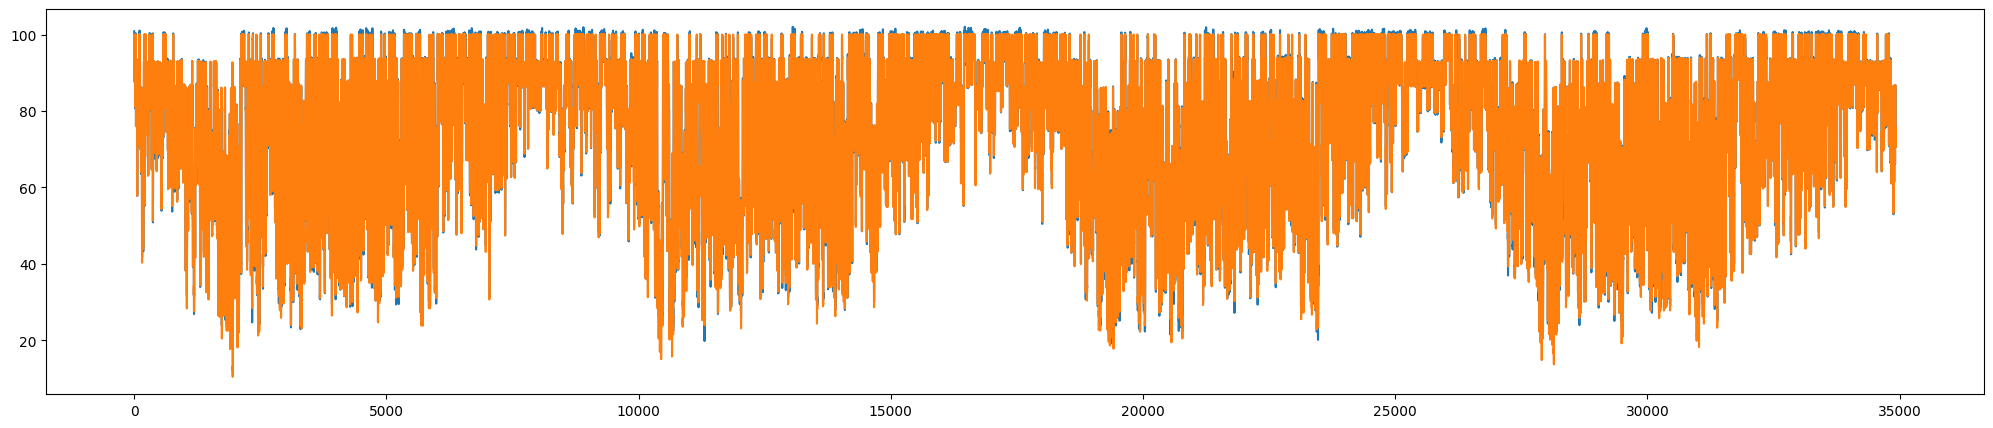

In [86]:
f = plt.figure() 
f.set_figwidth(25) 
f.set_figheight(5) 
plt.plot(y_pred_xgb[["relh"]])
plt.plot(y_test_xgb[["relh"]]) 

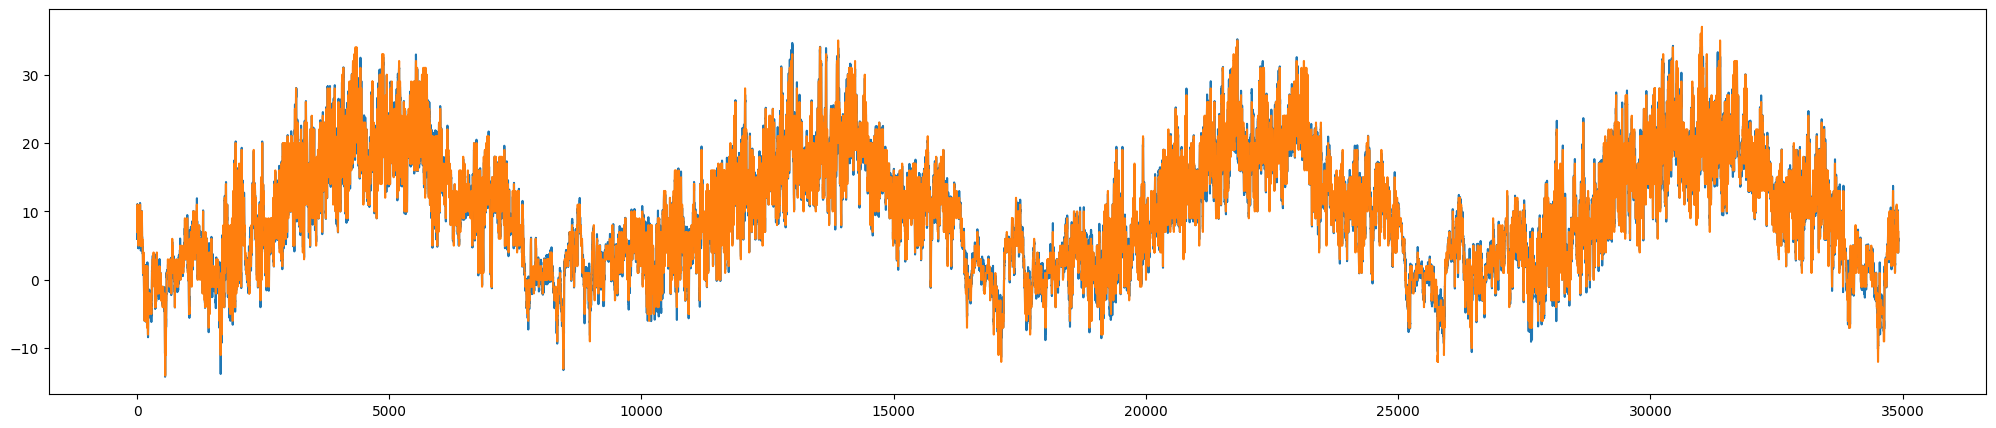

In [88]:
f = plt.figure() 
f.set_figwidth(25) 
f.set_figheight(5) 
plt.plot(y_pred_xgb[["tmpc"]])
plt.plot(y_test_xgb[["tmpc"]]) 

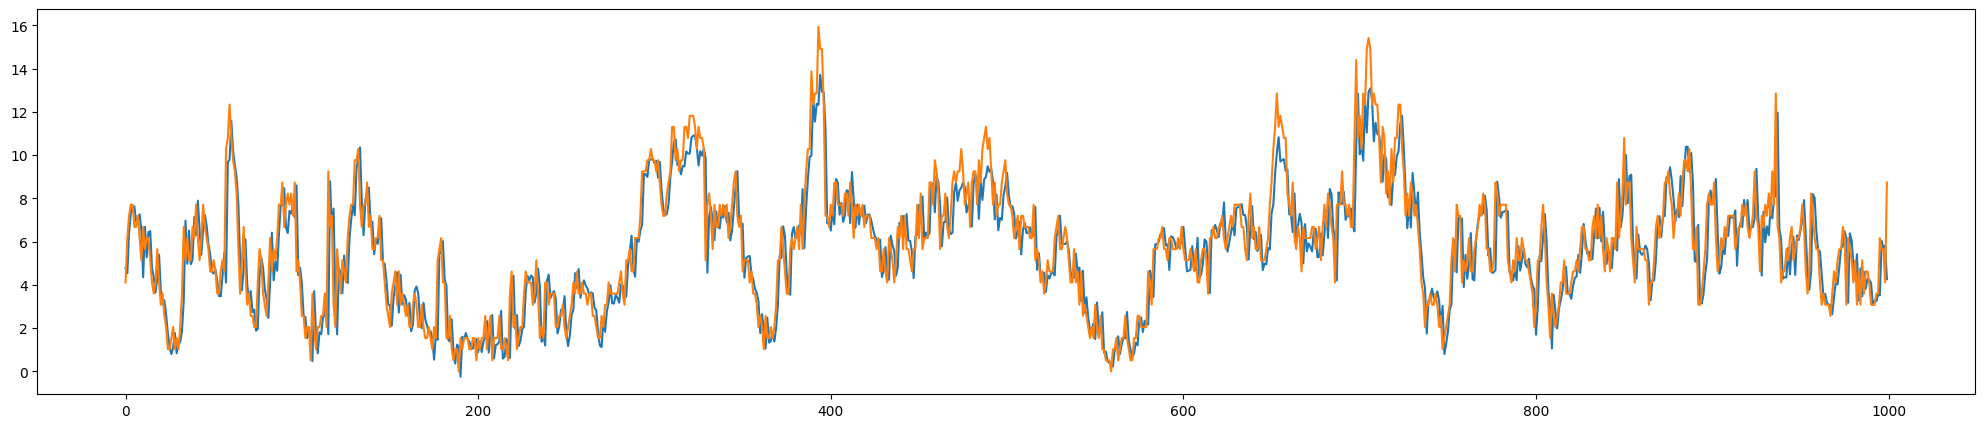

In [91]:
f = plt.figure() 
f.set_figwidth(25) 
f.set_figheight(5) 
plt.plot(y_pred_xgb[["sped"]])
plt.plot(y_test_xgb[["sped"]]) 